In [2]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.utils import shuffle
from keras.models import load_model

### Traitement des données d'entrainement

In [3]:
input_height , input_width = 224 , 224
output_height , output_width = 224 , 224

In [4]:
dir_data = '../dataset1/'
dir_seg = dir_data + "annotations_prepped_train/"
dir_img = dir_data + "images_prepped_train/"
sns.set_style("whitegrid", {'axes.grid' : False})

In [5]:
ldseg = np.array(os.listdir(dir_seg))
fnm = ldseg[0]
seg = cv2.imread(dir_seg + fnm ) # (360, 480, 3)
img_is = cv2.imread(dir_img + fnm )
mi, ma = np.min(seg), np.max(seg)
n_classes = ma - mi + 1

In [6]:
def give_color_to_seg_img(seg,n_classes):
    
    if len(seg.shape)==3:
        seg = seg[:,:,0]
    seg_img = np.zeros( (seg.shape[0],seg.shape[1],3) ).astype('float')
    colors = sns.color_palette("hls", n_classes)
    
    for c in range(n_classes):
        segc = (seg == c)
        seg_img[:,:,0] += (segc*( colors[c][0] ))
        seg_img[:,:,1] += (segc*( colors[c][1] ))
        seg_img[:,:,2] += (segc*( colors[c][2] ))

    return(seg_img)

In [7]:
ldseg = np.array(os.listdir(dir_seg))
for fnm in ldseg[np.random.choice(len(ldseg),3,replace=False)]:
    fnm = fnm.split(".")[0]
    seg = cv2.imread(dir_seg + fnm + ".png") # (360, 480, 3)
    img_is = cv2.imread(dir_img + fnm + ".png")
    seg_img = give_color_to_seg_img(seg,n_classes)


def getImageArr( path , width , height ):
        img = cv2.imread(path, 1)
        img = np.float32(cv2.resize(img, ( width , height ))) / 127.5 - 1
        return img

def getSegmentationArr( path , nClasses ,  width , height  ):

    seg_labels = np.zeros((  height , width  , nClasses ))
    img = cv2.imread(path, 1)
    img = cv2.resize(img, ( width , height ))
    img = img[:, : , 0]

    for c in range(nClasses):
        seg_labels[: , : , c ] = (img == c ).astype(int)
    return seg_labels

In [8]:
images = os.listdir(dir_img)
images.sort()
segmentations  = os.listdir(dir_seg)
segmentations.sort()

In [9]:
X = []
Y = []
for im , seg in zip(images,segmentations) :
    X.append( getImageArr(dir_img + im , input_width , input_height )  )
    Y.append( getSegmentationArr( dir_seg + seg , n_classes , output_width , output_height )  )

In [10]:
X, Y = np.array(X) , np.array(Y)

### TESTING

In [11]:
train_rate = 0.85
index_train = np.random.choice(X.shape[0],int(X.shape[0]*train_rate),replace=False)
index_test  = list(set(range(X.shape[0])) - set(index_train))

In [12]:
X = X[:5]
Y = Y[:5]

In [13]:
#X, Y = shuffle(X,Y)
#X_train, y_train = X[index_train],Y[index_train]
#X_test, y_test = X[index_test],Y[index_test]

### LOADING MODEL

In [ ]:
model = load_model('TP_Deep_learning_200.h5')

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### PREDICTION

In [14]:
y_pred = model.predict(X)

In [15]:
y_predi = np.argmax(y_pred, axis=3)
y_testi = np.argmax(Y, axis=3)
print(y_testi.shape,y_predi.shape)

(5, 224, 224) (5, 224, 224)


In [16]:
def IoU(Yi,y_predi):

    IoUs = []
    Nclass = int(np.max(Yi)) + 1
    for c in range(Nclass):
        TP = np.sum( (Yi == c)&(y_predi==c) )
        FP = np.sum( (Yi != c)&(y_predi==c) )
        FN = np.sum( (Yi == c)&(y_predi != c)) 
        IoU = TP/float(TP + FP + FN)
        print("class {:02.0f}: #TP={:6.0f}, #FP={:6.0f}, #FN={:5.0f}, IoU={:4.3f}".format(c,TP,FP,FN,IoU))
        IoUs.append(IoU)
    mIoU = np.mean(IoUs)
    print("_________________")
    print("Moyenne IoU: {:4.3f}".format(mIoU))

In [17]:
IoU(y_testi,y_predi)

class 00: #TP= 32601, #FP=  2385, #FN= 3349, IoU=0.850
class 01: #TP= 90385, #FP= 18779, #FN= 5992, IoU=0.785
class 02: #TP=     0, #FP=     3, #FN= 2914, IoU=0.000
class 03: #TP= 26423, #FP=  8965, #FN= 2997, IoU=0.688
class 04: #TP= 11053, #FP=  1001, #FN= 9256, IoU=0.519
class 05: #TP=  1693, #FP=   384, #FN= 3256, IoU=0.317
class 06: #TP=     0, #FP=     0, #FN= 4300, IoU=0.000
class 07: #TP=     0, #FP=     1, #FN=  595, IoU=0.000
class 08: #TP= 32338, #FP= 16240, #FN= 6333, IoU=0.589
class 09: #TP=     0, #FP=     0, #FN= 2690, IoU=0.000
class 10: #TP=     0, #FP=     0, #FN=  572, IoU=0.000
class 11: #TP=  7816, #FP=   813, #FN= 6317, IoU=0.523
_________________
Moyenne IoU: 0.356


In [18]:
shape = (224,224)
n_classes= 12

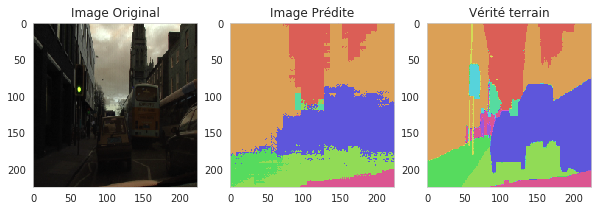

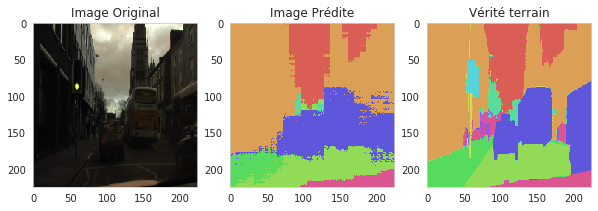

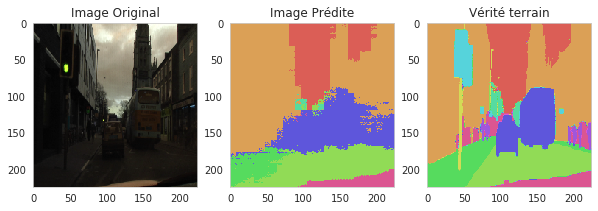

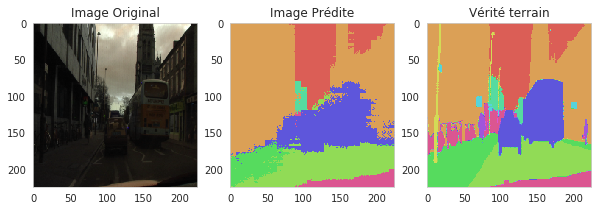

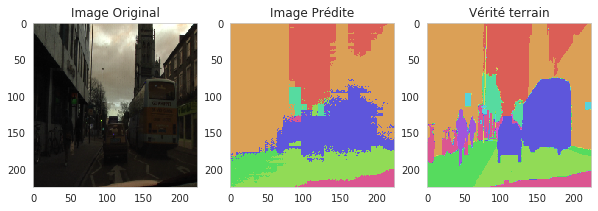

In [21]:
for i in range(5):
    img_is  = (X[i] + 1)*(255.0/2)
    seg = y_predi[i]
    segtest = y_testi[i]

    fig = plt.figure(figsize=(10,30))    
    ax = fig.add_subplot(1,3,1)
    ax.imshow(img_is/255.0)
    ax.set_title("Image Original")
    
    ax = fig.add_subplot(1,3,2)
    ax.imshow(give_color_to_seg_img(seg,n_classes))
    ax.set_title("Image Prédite")
    
    ax = fig.add_subplot(1,3,3)
    ax.imshow(give_color_to_seg_img(segtest,n_classes))
    ax.set_title("Vérité terrain")
    plt.show()
    
    fig.savefig("../RAPPORT/images_/" + str(i)+'_seg00.png')
